## Amirreza Hosseini
**9820363**

Introduction to Data Mining
HomeWork 2 <br>
Q8

In [1]:
import pandas as pd

0-read the csv file and store it in a dataframe and show the Data frame<br/>
Split the data into 80% training and 20% testing<br/>
Normalize the data

In [2]:
iris = pd.read_csv('./iris.csv', sep=',')

iris.drop("Unnamed: 0", axis=1, inplace=True)

iris

,Class,Petal length,Sepal length,Sepal width,Petal width
0,1,51,35,14,2
1,1,49,30,14,2
2,1,47,32,13,2
3,1,46,31,15,2
4,1,50,36,14,2
...,...,...,...,...,...
145,3,67,30,52,23
146,3,63,25,50,19
147,3,65,30,52,20
148,3,62,34,54,23


In [3]:
Y=iris['Class']
X=iris.drop('Class',axis=1)

In [4]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

minmax_df = scaler.fit_transform(X)
X = pd.DataFrame(minmax_df, columns=X.columns)

X

,Petal length,Sepal length,Sepal width,Petal width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)   

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (120, 4)
The shape of X_test is: (30, 4)
The shape of Y_train is: (120,)
The shape of Y_test is: (30,)


1- KNN classifier with KDtree approach <br/>
find the best K with cv grid search

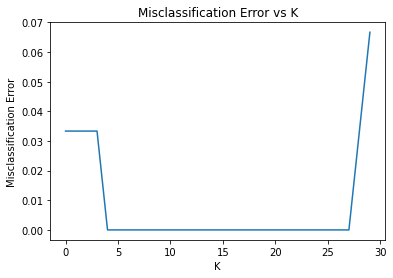

In [27]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score
#KDtree aproach
errors=list()

for i in range(1,31):
    KNN = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=i)
    #find misclassification error
    KNN.fit(X_train,Y_train)
    Y_pred_test = KNN.predict(X_test)
    errors.append(1-accuracy_score(Y_test,Y_pred_test))

sns.lineplot(errors)
plt.xlabel('K')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs K')
plt.show()
    

In [20]:
from sklearn.model_selection import GridSearchCV

#knn parameters kd_tree with k in range 1-30
knn_params = {'n_neighbors': list(range(1,30)),
 'weights':['distance'],
 'algorithm': [ 'kd_tree']}

knn_cv = GridSearchCV(KNeighborsClassifier(),knn_params,cv=10)
knn_cv.fit(X_train, Y_train)
print("Best Parameters :",knn_cv.best_params_)
print("GridSearch Score :",(knn_cv.best_score_*100).round(2),'%')

knn_cv.fit(X_train,Y_train)
accuracy = knn_cv.score(X_test, Y_test)
print('KNN Model Accuracy:',(accuracy*100).round(2),'%')
print('KNN Model Precision:',(precision_score(Y_test, Y_pred_test, average='weighted')*100).round(2),'%')

Best Parameters : {'algorithm': 'kd_tree', 'n_neighbors': 3, 'weights': 'distance'}
GridSearch Score : 95.0 %
KNN Model Accuracy: 96.67 %
KNN Model Precision: 97.14 %


In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

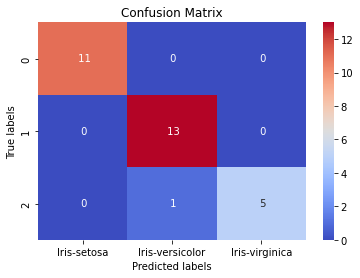

In [9]:
#confusion matrix for best k
plot_confusion_matrix(Y_test, knn_cv.predict(X_test))

2- Do the same with Balltree

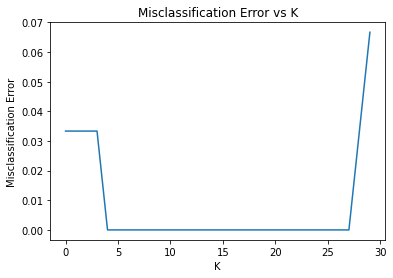

In [26]:
#Balltree approach
errors=list()

for i in range(1,31):
    KNN = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=i)
    #find classification error
    KNN.fit(X_train,Y_train)
    Y_pred_test = KNN.predict(X_test)
    errors.append(1-accuracy_score(Y_test,Y_pred_test))

sns.lineplot(errors)
plt.xlabel('K')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs K')
plt.show()

In [19]:
#knn parameters kd_tree with k in range 1-30
knn_params = {'n_neighbors': list(range(1,30)),
 'weights':['distance'],
 'algorithm': ['ball_tree']}

knn_cv = GridSearchCV(KNeighborsClassifier(),knn_params,cv=10)
knn_cv.fit(X_train, Y_train)
print("Best Parameters :",knn_cv.best_params_)
print("GridSearch Score :",(knn_cv.best_score_*100).round(2),'%')

knn_cv.fit(X_train,Y_train)
accuracy = knn_cv.score(X_test, Y_test)
print('KNN Model Accuracy:',(accuracy*100).round(2),'%')
print('KNN Model Precision:',(precision_score(Y_test, Y_pred_test, average='weighted')*100).round(2),'%')

Best Parameters : {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
GridSearch Score : 95.0 %
KNN Model Accuracy: 96.67 %
KNN Model Precision: 97.14 %


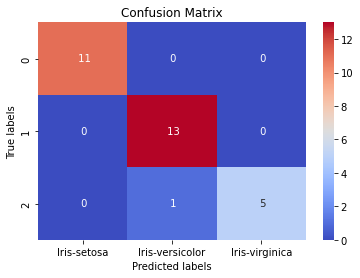

In [12]:
#confusion matrix for best k
plot_confusion_matrix(Y_test, knn_cv.predict(X_test))

as it is clear, because of small size and features of iris dataset, every two of the approaches has the same results.